<a href="https://colab.research.google.com/github/JakeEisner/ECON3916-Statistical-Machine-Learning/blob/main/Assignment%202/Econ_3916_Assignment_2_Audit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Mission: You are a Data Quality Auditor at Pareto Ventures, a Series B VC firm. Your Managing Partner has handed you due diligence dossiers on three potential portfolio companies. Each claims to have "perfect" metrics: stable servers, accurate AI, and successful A/B tests.

Your job is to find the statistical lie hidden in their averages. You will transition from a builder of metrics to a forensic auditor of algorithms.



In [49]:
# Toolkit

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Phase 1: The Robustness Audit (Topic 4)


In [50]:
# Step 1.1: "The Latency" Trap

# Manual DGP Simulation
import numpy as np
normal_traffic = np.random.randint(20, 50, 980)
spike_traffic = np.random.randint(1000, 5000, 20)
latency_logs = np.concatenate([normal_traffic, spike_traffic])

In [51]:
# Step 1.2: Manual MAD vs. SD

def calculate_mad(data):
    # 1. Calculate the Median of the data
    median = np.median(data)
    # 2. Calculate Absolute Deviations (|x - median|)
    absolute_deviations = np.abs(data - median)
    # 3. Return the Median of those deviations
    return np.median(absolute_deviations)


Phase 2: The Probability Audit (Topic 5)

In [52]:
# Step 2.1: The False Positive Paradox

def bayesian_audit(prior, sensitivity, specificity):
  # True & False Positives
  true_positive = sensitivity * prior
  false_positive = (1 - specificity) * (1 - prior)
  #Total Flagged Probability
  total_prob_flagged = true_positive + false_positive
  posterior_probability = true_positive / total_prob_flagged

  return posterior_probability

Phase 3: The Bias Audit (Topic 6)

In [53]:
# Chi-Square Formula: Sum( (Observed - Expected)^2 / Expected )
observed = np.array([50250,49750])
expected = np.array([50000,50000])

# Write the calculation loop...
chi_square = 0
for i in range(len(observed)):
  chi_square += (observed[i] - expected[i])**2 / expected[i]

print("Chi-Square", chi_square)

if chi_square > 3.84:
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

Chi-Square 2.5
Fail to Reject Null Hypothesis


Phase 4: AI Expansion (The Co-Pilot Era)


Mean Market Cap (ALL tokens):       2,740.84
Mean Market Cap (TOP 1% survivors): 44,633.52
Survivorship Bias Multiplier:       16.28x


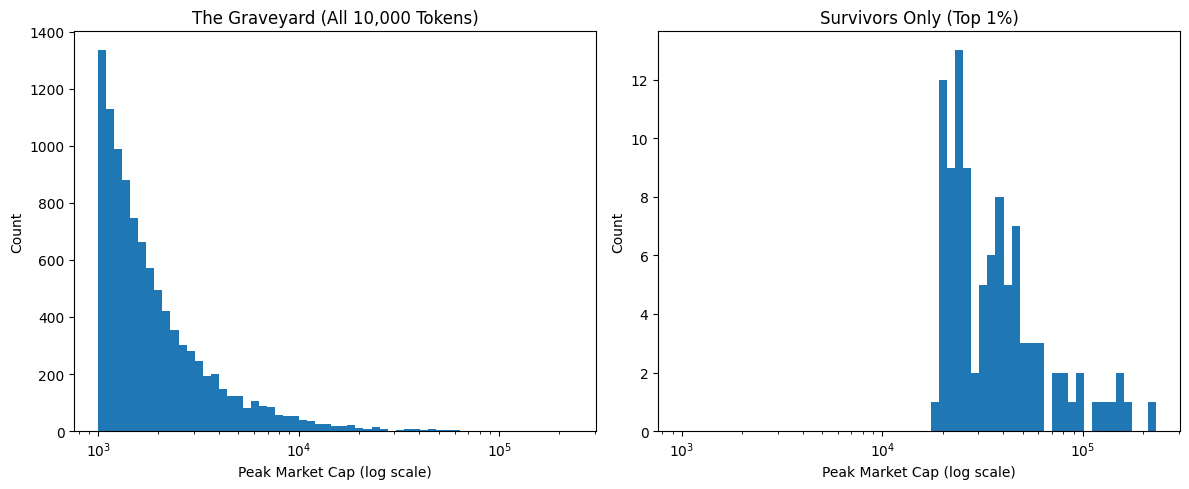

In [54]:
# Task 4.1: The "Memecoin Graveyard" Simulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------
# 1) Simulate 10,000 launches
# ----------------------------
np.random.seed(42)
n = 10_000

# Pareto / power-law settings (tune alpha to control tail heaviness)
alpha = 1.5  # smaller = fatter tail
scale = 1_000  # baseline market cap scale

# numpy.pareto(alpha) returns values >= 0, so add 1 then scale
peak_market_cap = scale * (np.random.pareto(alpha, n) + 1)

df_all = pd.DataFrame({
    "token_id": np.arange(n),
    "peak_market_cap": peak_market_cap
})

# -----------------------------------------
# 2) Survivors = top 1% by peak market cap
# -----------------------------------------
cutoff = df_all["peak_market_cap"].quantile(0.99)
df_survivors = df_all[df_all["peak_market_cap"] >= cutoff].copy()

# ----------------------------
# 3) Evaluate the bias (means)
# ----------------------------
mean_all = df_all["peak_market_cap"].mean()
mean_survivors = df_survivors["peak_market_cap"].mean()

print(f"Mean Market Cap (ALL tokens):       {mean_all:,.2f}")
print(f"Mean Market Cap (TOP 1% survivors): {mean_survivors:,.2f}")
print(f"Survivorship Bias Multiplier:       {mean_survivors / mean_all:,.2f}x")

# ----------------------------
# 4) Dual histograms (side-by-side)
# ----------------------------
# Use log-spaced bins so the power-law shape is visible
min_cap = df_all["peak_market_cap"].min()
max_cap = df_all["peak_market_cap"].max()
bins = np.logspace(np.log10(min_cap), np.log10(max_cap), 60)

plt.figure(figsize=(12, 5))

# Left: Graveyard (all)
plt.subplot(1, 2, 1)
plt.hist(df_all["peak_market_cap"], bins=bins)
plt.xscale("log")
plt.title("The Graveyard (All 10,000 Tokens)")
plt.xlabel("Peak Market Cap (log scale)")
plt.ylabel("Count")

# Right: Survivors (top 1%)
plt.subplot(1, 2, 2)
plt.hist(df_survivors["peak_market_cap"], bins=bins)
plt.xscale("log")
plt.title("Survivors Only (Top 1%)")
plt.xlabel("Peak Market Cap (log scale)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()
